In [1]:
from urllib.request import urlopen
import json
import pandas as pd
from plotnine import ggplot, geom_line, geom_col, aes, labs, geom_point, facet_grid, facet_wrap, theme, element_text, theme_bw
import subprocess

### You can run API with uvicorn monkeypox_api:app on your command line/terminal. 

-  I'm running a shell script to change directories, activate a venv and run the api with uvicorn.
-  You can also run the api programatically wthin python by importing uvicorn as a package.

In [2]:
api = subprocess.Popen(args="./api_launcher.sh", shell=True)

In [3]:
base_url = "http://127.0.0.1:8000/"

./api_launcher.sh: line 1: !#/bin/sh: No such file or directory


In [5]:
response = urlopen(f"{base_url}latestdata/")

INFO:     127.0.0.1:49706 - "GET /latestdata/ HTTP/1.1" 200 OK


In [6]:
j_res = json.load(response)

In [7]:
j_res

{'date': '2022-12-20',
 'records': [{'UK Nation': 'England',
   'Total': 3552,
   'Confirmed': 3404,
   'Highly Probable': 148},
  {'UK Nation': 'Northern Ireland',
   'Total': 34,
   'Confirmed': 34,
   'Highly Probable': 0},
  {'UK Nation': 'Scotland',
   'Total': 97,
   'Confirmed': 97,
   'Highly Probable': 0},
  {'UK Nation': 'Wales', 'Total': 47, 'Confirmed': 47, 'Highly Probable': 0},
  {'UK Nation': 'Total',
   'Total': 3730,
   'Confirmed': 3582,
   'Highly Probable': 148}]}

In [8]:
df = pd.json_normalize(j_res, record_path="records")

In [9]:
df = df.assign(Date=j_res["date"])

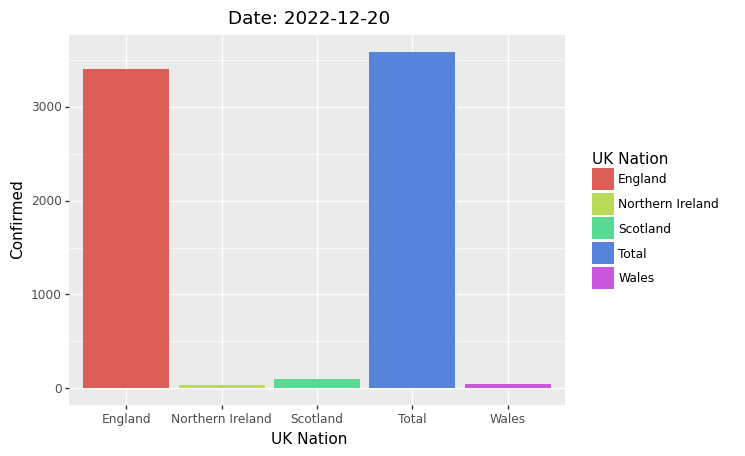

<ggplot: (355182855)>

In [10]:
(
    ggplot(df) +
    geom_col(aes(x="UK Nation", y="Confirmed", fill="UK Nation")) +
    labs(title=f"Date: {df['Date'][0]}")
)

In [11]:
response2 = urlopen(f"{base_url}search_range/?start_date=2022-10-25&end_date=2022-11-29")

INFO:     127.0.0.1:49713 - "GET /search_range/?start_date=2022-10-25&end_date=2022-11-29 HTTP/1.1" 200 OK


In [12]:
j_res2 = json.load(response2)

In [13]:
dfs = [pd.json_normalize(x, record_path="records").assign(Date=x["date"]) for x in j_res2.values()]

In [14]:
df2 = pd.concat(dfs, ignore_index=True)

In [15]:
df2 = df2.astype({"Date": "datetime64[ns]"})

In [16]:
df3 = (
    df2.groupby("UK Nation")
    .agg({"Confirmed": "diff"})
)

In [17]:
df4 = df2.assign(NewConfirmed=df3["Confirmed"])

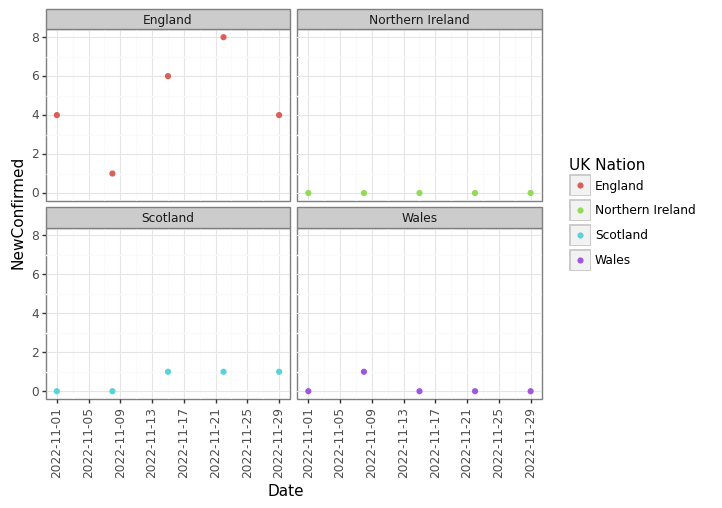

<ggplot: (357174001)>

In [18]:
(
    ggplot(df4[df4["UK Nation"] !=  "Total"].dropna()) +
    geom_point(aes(x="Date", y="NewConfirmed", colour="UK Nation")) +
    facet_wrap(facets="UK Nation") +
    theme_bw() +
    theme(axis_text_x=element_text(rotation=90))
    
    
)